In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("EQ Repository Requested Data.csv")
df

,No,Event ID,Date time,Latitude,Longitude,Magnitude,Mag Type,Depth (km),Phase Count,Azimuth Gap,Location,Agency
0,1,bmg2024inoy,2024-05-01T06:35:52.433043Z,-1.710596,120.091766,2.837047,M,10,23,76.859665,"Sulawesi, Indonesia",BMKG
1,2,bmg2024injv,2024-05-01T04:00:52.007557Z,-5.944668,130.647629,4.846796,MLv,133,48,78.901794,Banda Sea,BMKG
2,3,bmg2024injs,2024-05-01T03:57:30.664236Z,-6.438559,107.307701,2.836673,M,10,25,80.936186,"Java, Indonesia",BMKG
3,4,bmg2024inia,2024-05-01T03:06:11.494109Z,-7.134665,107.558365,4.171044,M,10,69,83.403366,"Java, Indonesia",BMKG
4,5,bmg2024ingp,2024-05-01T02:23:37.672776Z,-7.266338,129.565552,4.551028,M,166,68,55.587601,Banda Sea,BMKG
...,...,...,...,...,...,...,...,...,...,...,...,...
661,666,bmg2024gldq,2024-04-01T11:32:21.820523Z,-8.737351,109.740349,3.031500,M,12,22,237.116982,"Java, Indonesia",BMKG
662,667,bmg2024gldb,2024-04-01T11:14:53.526143Z,4.079156,128.337433,4.160199,M,14,19,255.591034,"North of Halmahera, Indonesia",BMKG
663,668,bmg2024glcw,2024-04-01T11:09:01.756269Z,-0.221772,123.710251,3.289224,M,54,27,87.837761,"Minahassa Peninsula, Sulawesi",BMKG
664,669,bmg2024glbr,2024-04-01T10:32:54.397Z,-5.309146,102.562805,4.191902,M,13,29,156.701263,"Southern Sumatra, Indonesia",BMKG


In [3]:
def categorize_depth(depth):
    if depth <= 50:
        return 'merah'
    elif depth <= 100:
        return 'jingga'
    elif depth <= 250:
        return 'kuning'
    elif depth <= 600:
        return 'hijau'
    else:
        return 'putih'

# Langkah 3: Terapkan fungsi ke kolom 'depth' untuk membuat kolom baru 'MMI'
df['MMI'] = df['Depth (km)'].apply(categorize_depth)

# Menampilkan DataFrame dengan kolom baru
df

,No,Event ID,Date time,Latitude,Longitude,Magnitude,Mag Type,Depth (km),Phase Count,Azimuth Gap,Location,Agency,MMI
0,1,bmg2024inoy,2024-05-01T06:35:52.433043Z,-1.710596,120.091766,2.837047,M,10,23,76.859665,"Sulawesi, Indonesia",BMKG,merah
1,2,bmg2024injv,2024-05-01T04:00:52.007557Z,-5.944668,130.647629,4.846796,MLv,133,48,78.901794,Banda Sea,BMKG,kuning
2,3,bmg2024injs,2024-05-01T03:57:30.664236Z,-6.438559,107.307701,2.836673,M,10,25,80.936186,"Java, Indonesia",BMKG,merah
3,4,bmg2024inia,2024-05-01T03:06:11.494109Z,-7.134665,107.558365,4.171044,M,10,69,83.403366,"Java, Indonesia",BMKG,merah
4,5,bmg2024ingp,2024-05-01T02:23:37.672776Z,-7.266338,129.565552,4.551028,M,166,68,55.587601,Banda Sea,BMKG,kuning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,666,bmg2024gldq,2024-04-01T11:32:21.820523Z,-8.737351,109.740349,3.031500,M,12,22,237.116982,"Java, Indonesia",BMKG,merah
662,667,bmg2024gldb,2024-04-01T11:14:53.526143Z,4.079156,128.337433,4.160199,M,14,19,255.591034,"North of Halmahera, Indonesia",BMKG,merah
663,668,bmg2024glcw,2024-04-01T11:09:01.756269Z,-0.221772,123.710251,3.289224,M,54,27,87.837761,"Minahassa Peninsula, Sulawesi",BMKG,jingga
664,669,bmg2024glbr,2024-04-01T10:32:54.397Z,-5.309146,102.562805,4.191902,M,13,29,156.701263,"Southern Sumatra, Indonesia",BMKG,merah


In [4]:
df.isna().sum()

No             0
Event ID       0
Date time      0
Latitude       0
Longitude      0
Magnitude      0
Mag Type       0
Depth (km)     0
Phase Count    0
Azimuth Gap    0
Location       0
Agency         0
MMI            0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

# Menghapus kolom yang tidak diperlukan ('No', 'Event ID', 'Date time', 'Location', 'Agency')
data = df.drop(columns=['No', 'Event ID', 'Date time', 'Location', 'Agency'])

# Mengubah tipe data jika diperlukan (misalnya memastikan kolom 'Depth (km)' adalah numerik)
data['Depth (km)'] = data['Depth (km)'].astype(float)

# Encoding data kategoris ('Mag Type' dan 'MMI')
label_encoder = LabelEncoder()
data['Mag Type'] = label_encoder.fit_transform(data['Mag Type'])
# Encoding kolom 'MMI'
data['MMI'] = label_encoder.fit_transform(data['MMI'])

data

,Latitude,Longitude,Magnitude,Mag Type,Depth (km),Phase Count,Azimuth Gap,MMI
0,-1.710596,120.091766,2.837047,0,10.0,23,76.859665,3
1,-5.944668,130.647629,4.846796,1,133.0,48,78.901794,2
2,-6.438559,107.307701,2.836673,0,10.0,25,80.936186,3
3,-7.134665,107.558365,4.171044,0,10.0,69,83.403366,3
4,-7.266338,129.565552,4.551028,0,166.0,68,55.587601,2
...,...,...,...,...,...,...,...,...
661,-8.737351,109.740349,3.031500,0,12.0,22,237.116982,3
662,4.079156,128.337433,4.160199,0,14.0,19,255.591034,3
663,-0.221772,123.710251,3.289224,0,54.0,27,87.837761,1
664,-5.309146,102.562805,4.191902,0,13.0,29,156.701263,3


3    514
2     95
1     50
0      7
Name: MMI, dtype: int64


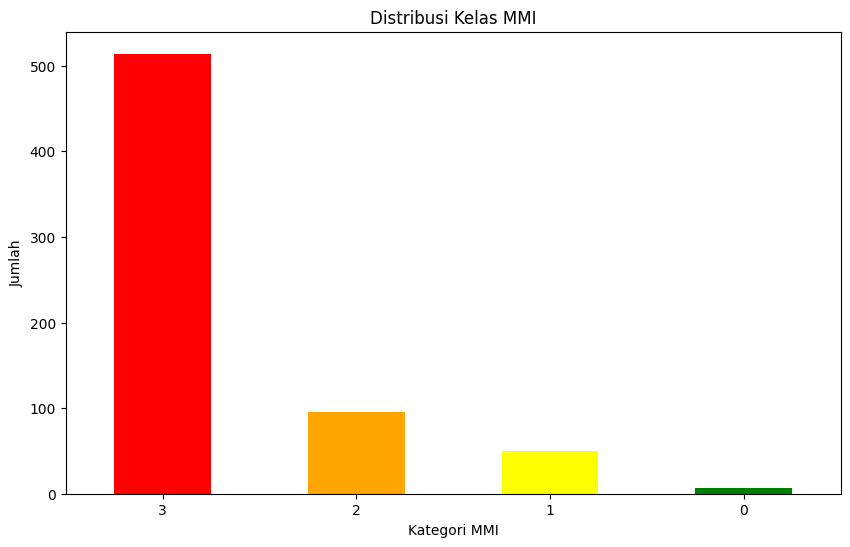

In [6]:
# Melihat distribusi setiap kelas 
mmi_distribution = data['MMI'].value_counts()
print(mmi_distribution)

# Visualisasi distribusi kelas
plt.figure(figsize=(10, 6))
mmi_distribution.plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'white'])
plt.title('Distribusi Kelas MMI')
plt.xlabel('Kategori MMI')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

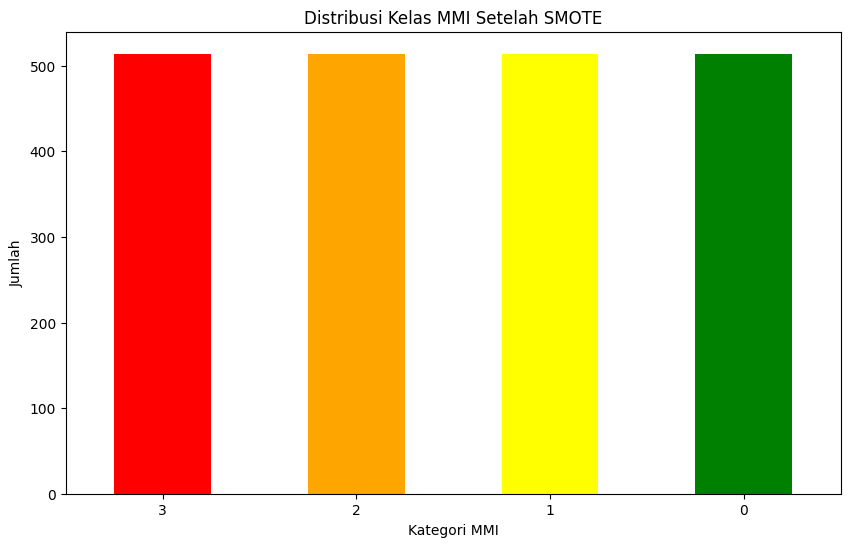

In [7]:
from imblearn.over_sampling import SMOTE

# Pisahkan fitur dan target
X = data.drop(columns=['MMI'])
y = data['MMI']

# Terapkan SMOTE pada data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Buat DataFrame baru dengan data resampled
df_resampled = X_resampled.copy()
df_resampled['MMI'] = y_resampled

# Visualisasikan distribusi kelas setelah SMOTE
plt.figure(figsize=(10, 6))
y_resampled.value_counts().plot(kind='bar', color=['red', 'orange', 'yellow', 'green'])
plt.title('Distribusi Kelas MMI Setelah SMOTE')
plt.xlabel('Kategori MMI')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [8]:
df_resampled

,Latitude,Longitude,Magnitude,Mag Type,Depth (km),Phase Count,Azimuth Gap,MMI
0,-1.710596,120.091766,2.837047,0,10.000000,23,76.859665,3
1,-5.944668,130.647629,4.846796,1,133.000000,48,78.901794,2
2,-6.438559,107.307701,2.836673,0,10.000000,25,80.936186,3
3,-7.134665,107.558365,4.171044,0,10.000000,69,83.403366,3
4,-7.266338,129.565552,4.551028,0,166.000000,68,55.587601,2
...,...,...,...,...,...,...,...,...
2051,-1.296461,125.080438,3.286628,0,123.052524,33,93.800422,2
2052,-6.986729,130.234655,4.348346,0,140.077859,42,65.551458,2
2053,0.314671,122.066378,3.166662,0,163.313673,41,60.327028,2
2054,-8.595044,121.873873,3.460488,0,110.502521,53,69.493740,2


In [9]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Latih model dengan data training
model.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred = model.predict(X_test)

In [11]:
# Evaluasi kinerja model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        98
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       111

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Confusion Matrix:
[[103   0   0   0]
 [  0  98   0   0]
 [  0   0 100   0]
 [  0   0   0 111]]


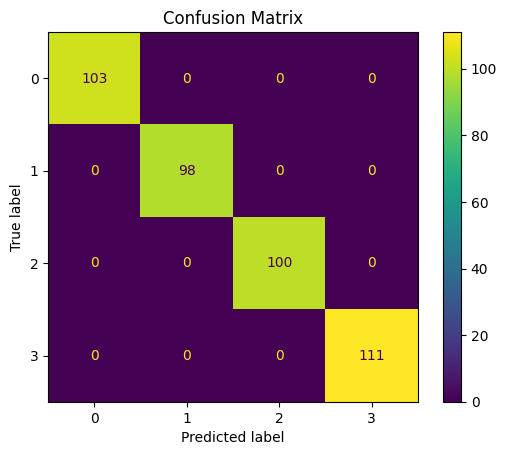

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix')
plt.show()

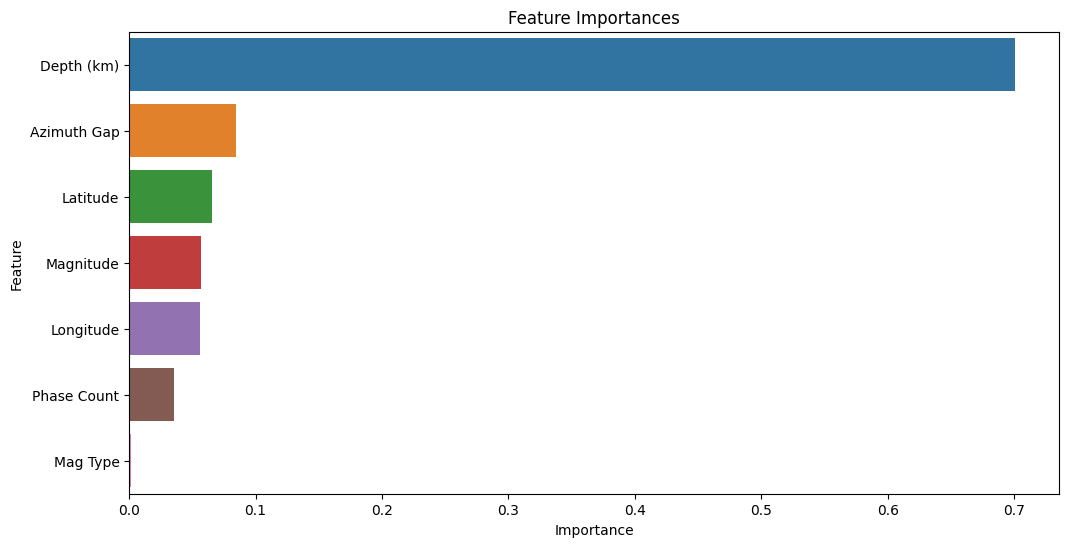

In [13]:
# Melihat pentingnya fitur
importances = model.feature_importances_
features = X.columns

# Buat DataFrame untuk fitur dan kepentingannya
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot pentingnya fitur
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Latih GridSearchCV
grid_search.fit(X_train, y_train)

# Cetak hasil terbaik
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END m

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest dengan best parameter
best_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Latih model dengan seluruh dataset pelatihan
best_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Prediksi pada data uji
y_pred_test = best_model.predict(X_test)

# Evaluasi kinerja model pada data uji
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        98
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       111

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



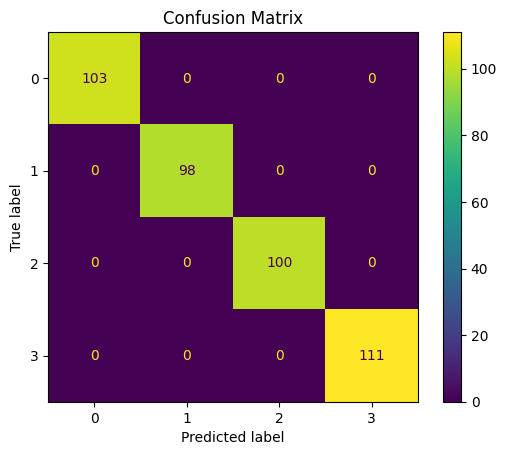

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.title('Confusion Matrix')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        98
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       111

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Confusion Matrix:
[[103   0   0   0]
 [  0  98   0   0]
 [  0   0 100   0]
 [  0   0   0 111]]


Model: Decision Tree
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        98
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       111

    accuracy                           1.00       412
   macro avg       1

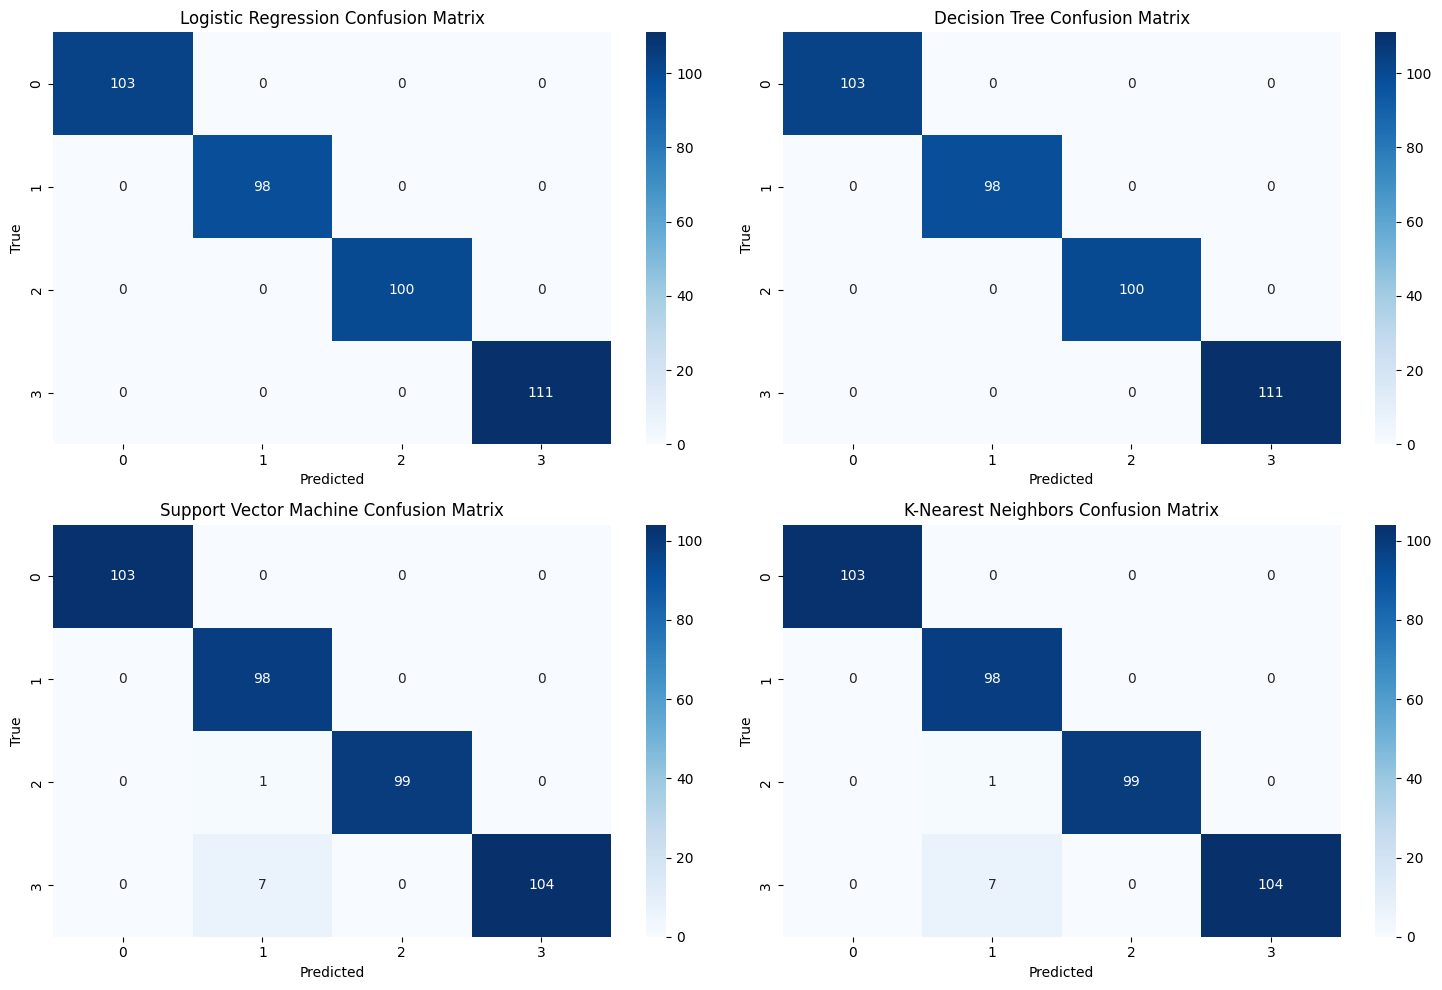

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Membuat dictionary untuk menyimpan hasil
results = {}

# Melatih dan evaluasi masing-masing model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Menyimpan hasil evaluasi
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    
    # Mencetak hasil evaluasi
    print(f"Model: {name}")
    print(f"Accuracy: {results[name]['Accuracy']}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Visualisasi Confusion Matrix dari masing-masing model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for (name, model), ax in zip(models.items(), axes.flatten()):
    sns.heatmap(results[name]['Confusion Matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

### Tanpa Resampling

3    514
2     95
1     50
0      7
Name: MMI, dtype: int64


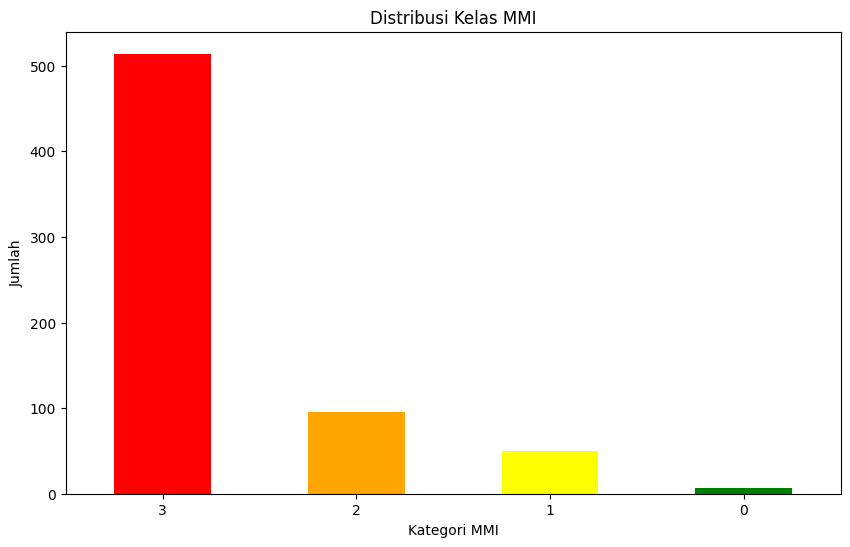

In [19]:
# Melihat distribusi setiap kelas 
mmi_distribution = data['MMI'].value_counts()
print(mmi_distribution)

# Visualisasi distribusi kelas
plt.figure(figsize=(10, 6))
mmi_distribution.plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'white'])
plt.title('Distribusi Kelas MMI')
plt.xlabel('Kategori MMI')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [20]:
# Pisahkan fitur dan target
X = data.drop(columns=['MMI'])
y = data['MMI']

In [21]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Latih model dengan data training
model.fit(x_train, y_train)

# Prediksi dengan data testing
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score

# Prediksi pada data uji
y_pred = model.predict(x_test)

# Evaluasi kinerja model pada data uji
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9850746268656716
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        12
           2       0.91      1.00      0.95        21
           3       1.00      1.00      1.00        99

    accuracy                           0.99       134
   macro avg       0.73      0.75      0.74       134
weighted avg       0.97      0.99      0.98       134



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

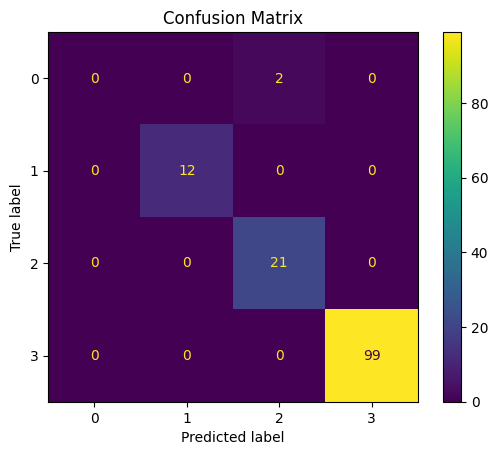

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9701492537313433
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.92      1.00      0.96        12
           2       0.95      0.86      0.90        21
           3       1.00      1.00      1.00        99

    accuracy                           0.97       134
   macro avg       0.80      0.84      0.82       134
weighted avg       0.97      0.97      0.97       134

Confusion Matrix:
[[ 1  0  1  0]
 [ 0 12  0  0]
 [ 2  1 18  0]
 [ 0  0  0 99]]


Model: Decision Tree
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        99

    accuracy                           1.00       134
   macro avg       1.

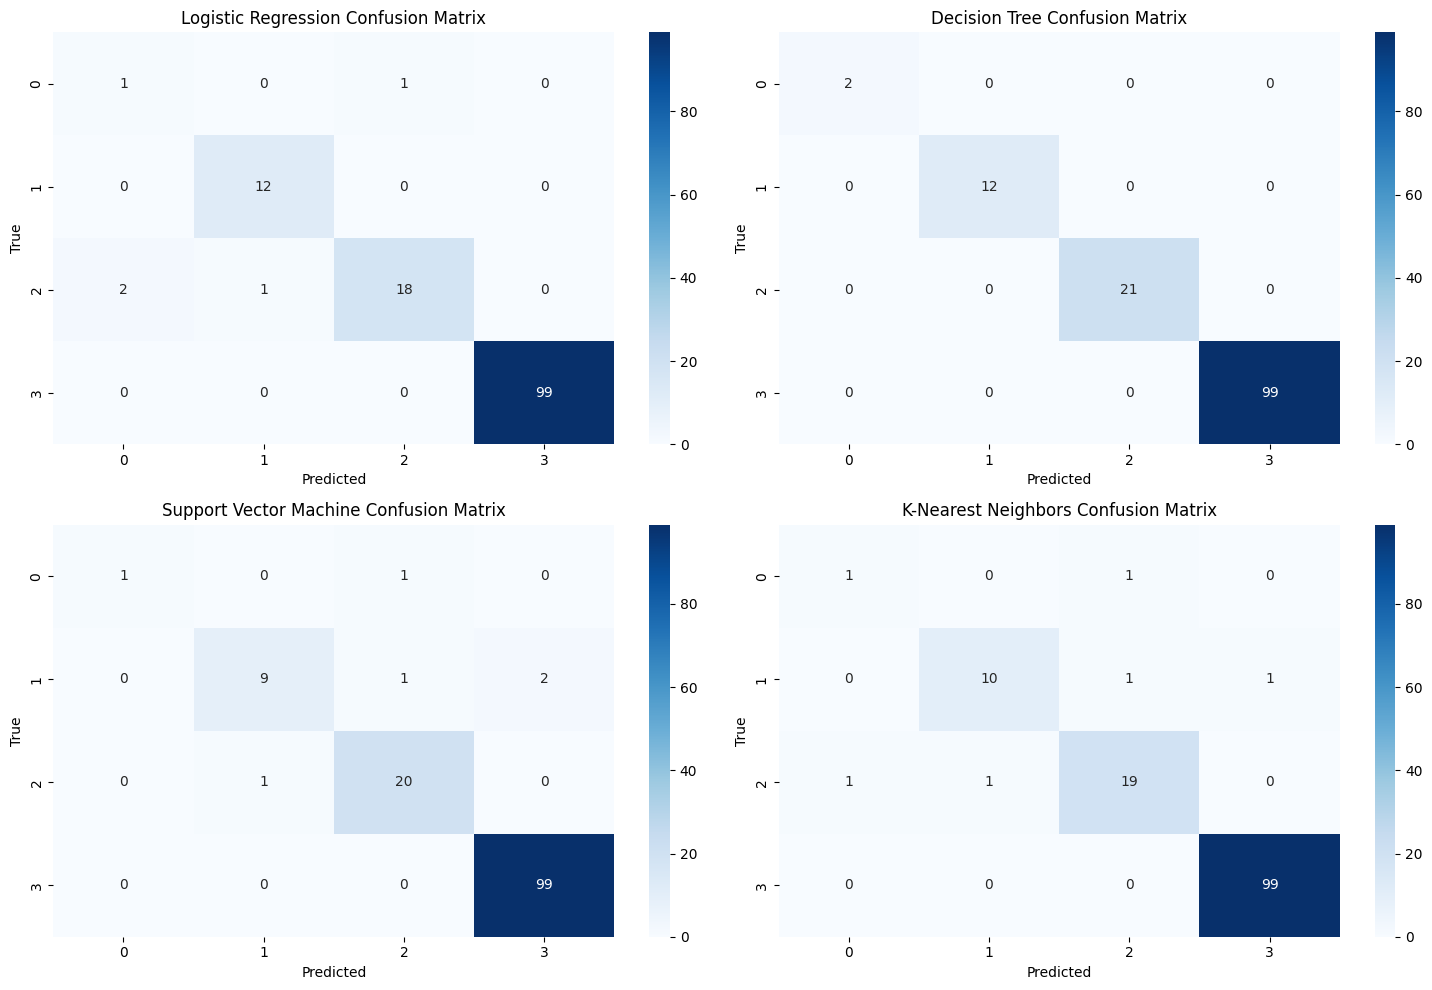

In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan data telah dibaca ke dalam DataFrame 'data'
# data = pd.read_csv('path_to_your_data.csv')

# Pisahkan fitur dan target
X = data.drop(columns=['MMI'])
y = data['MMI']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Membuat dictionary untuk menyimpan hasil
results = {}

# Melatih dan evaluasi masing-masing model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Menyimpan hasil evaluasi
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    
    # Mencetak hasil evaluasi
    print(f"Model: {name}")
    print(f"Accuracy: {results[name]['Accuracy']}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Visualisasi Confusion Matrix dari masing-masing model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for (name, result), ax in zip(results.items(), axes.flatten()):
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()


In [26]:
## Now we'll visualise the data by country
## But the country column has many missing values, we'll fix them and plot the data

## Let's fill the missing values in country column with information available in the location column

## Create a new dataframe using the location information in the earthquake dataset
## Make it into a two column dataframe by moving the last word of the location information in to the second (last) column
## Now the second column of new dataframe has country name, which we use to fill in our original dataset

df_r = df['Location'].str.split(pat=',', n=1, expand=True)
print(df_r.head(5))                       ## View the new dataframe

## fill the missing country data, with country names in country column of df_r (df_r[1] is the country column)

# df['country'] = df['country'].fillna(df_r[1])  
# print('\n', 'Missing values in the refined country column are : ', df['country'].isna().sum())

           0           1
0   Sulawesi   Indonesia
1  Banda Sea        None
2       Java   Indonesia
3       Java   Indonesia
4  Banda Sea        None


In [27]:
# Making a fresh dataframe by droping null values from 'country','location','continent' columns

df_location=df.dropna(subset=['Longitude','Location','Magnitude'], how='all')
print('\n', 'Missing values in the country column are : ', df_location['Location'].isnull().sum())


 Missing values in the country column are :  0


In [28]:
## Let's have a look at the country names in the country column

df_location['Location'].unique()

array(['Sulawesi, Indonesia', 'Banda Sea', 'Java, Indonesia',
       'Mindanao, Philippines', 'Ceram Sea',
       'Minahassa Peninsula, Sulawesi', 'Northern Sumatra, Indonesia',
       'West Papua Region, Indonesia', 'Halmahera, Indonesia',
       'Sumbawa Region, Indonesia', 'Southern Molucca Sea',
       'Near North Coast of West Papua', 'Northern Molucca Sea',
       'Off West Coast of Northern Sumatra',
       'Tanimbar Islands Region, Indonesia', 'Buru, Indonesia',
       'Sunda Strait, Indonesia', 'Flores Region, Indonesia',
       'Celebes Sea', 'Southern Sumatra, Indonesia',
       'Bali Region, Indonesia', 'Talaud Islands, Indonesia',
       'Sumba Region, Indonesia', 'Java Sea', 'Seram, Indonesia',
       'Timor Region', 'South of Bali, Indonesia', 'Savu Sea',
       'West Papua, Indonesia', 'South of Java, Indonesia', 'Bali Sea',
       'Southwest of Sumatra, Indonesia', 'Flores Sea', 'Borneo',
       'North of Halmahera, Indonesia', 'Aru Islands Region, Indonesia'],
      d

In [ ]:
# ## Now we refine the column, for analysing and visualising the data country-wise

# ## First we remove all the extra spaces in the country column (in fact, the code will erase all the extra spaces across the dataset)

# df_country = df_country.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# ## Next we refine some country names

# df_country.replace({'country': {"the Fiji Islands" : "Fiji region", "Fiji" : "Fiji region", 
#                                 "the Kermadec Islands" : "New Zealand region", "the Loyalty Islands" : "New Caledonia", 
#                                 "Vanuatu" : "Vanuatu region", "South Sandwich Islands" : "South Sandwich Islands region", 
#                                 "South Georgia and the South Sandwich Islands" : "South Sandwich Islands region", 
#                                 "Prince Edward Islands region" : "Canada", "Okhotsk" : "Russia region", 
#                                 "off the west coast of northern Sumatra" : "Indonesia", 
#                                 "Philippine Islands region" : "Philippines", 
#                                 "the Kuril Islands" : "Kuril Islands", 
#                                 "United Kingdom of Great Britain and Northern Ireland (the)": "UK", 
#                                 "People's Republic of China": "CHINA", "United States of America": "USA", 
#                                 "Alaska": "USA", "Aleutian Islands, Alaska" : "USA", "California" : "USA", 
#                                 "India" : "India region", "Russia" : "Russia region", "New Zealand" : "New Zealand region", 
#                                 "Japan region" : "Japan"}}, inplace=True)

# df_country['country'].unique()

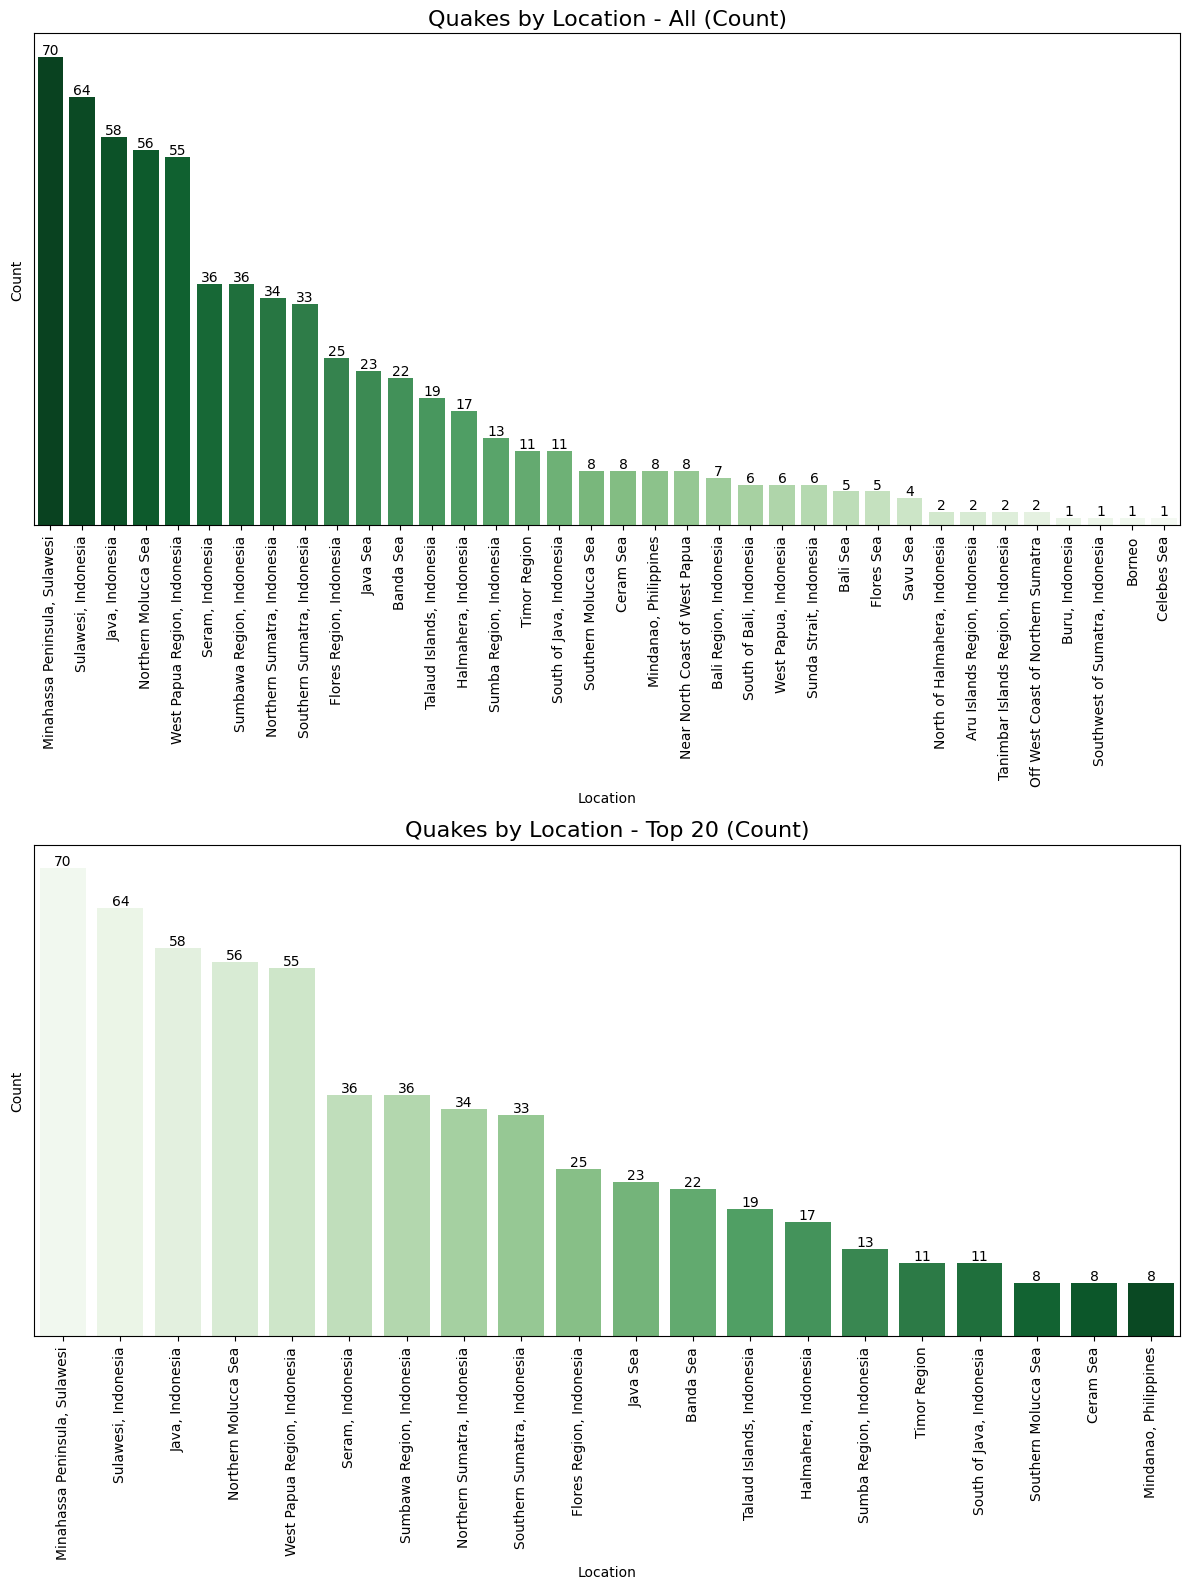

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe df_location misalkan telah terdefinisi
# df_location = pd.read_csv('path_to_your_data.csv')

plt.figure(figsize=(12, 16))

# Plot untuk semua lokasi
plt.subplot(211)
plt.title('Quakes by Location - All (Count)', fontsize=16)
ax1 = sns.countplot(x=df_location['Location'], palette='Greens_r', alpha=1, order=df_location['Location'].value_counts().index)

for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.yticks([])

# Plot untuk top 20 lokasi
plt.subplot(212)
plt.title('Quakes by Location - Top 20 (Count)', fontsize=16)
ax2 = sns.countplot(x=df_location['Location'], palette='Greens', alpha=1, order=df_location['Location'].value_counts().head(20).index)

for p in ax2.patches:
    ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.yticks([])

plt.tight_layout()
plt.show()


In [30]:
pip install folium


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import folium
from folium import plugins

In [32]:
## Indonesia Earthquake Heat Map
print("Earthquakes in Indonesia  -  Heat Map")
heat_map = df[["Latitude", "Longitude"]].values
Indonesia = folium.Map(location=[0, 105], zoom_start=4)
Indonesia.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
Indonesia


Earthquakes in Indonesia  -  Heat Map


In [36]:
import folium

# Buat peta Indonesia
Indonesia = folium.Map(location=[-2.5, 118], zoom_start=5)

# Tambahkan lingkaran di setiap titik koordinat dari data
for index, row in df.iterrows():
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        radius=10000,  # Atur radius lingkaran sesuai keinginan Anda
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(Indonesia)

# Tampilkan peta
Indonesia


In [42]:
import pandas as pd
import pickle
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split


In [46]:
import joblib

# Muat model dari file .pkl
model = joblib.load('RandomForest2_model.pkl')

# Sekarang Anda dapat menggunakan model untuk melakukan prediksi atau melakukan operasi lainnya


In [47]:
# Tampilkan informasi tentang model
print(model)
print(type(model))

RandomForestClassifier(random_state=42)
<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [52]:
import pandas as pd
import joblib

# Muat model yang sudah dilatih
model = joblib.load('RandomForest2_model.pkl')

# Baca data dari tabel "alert" ke dalam DataFrame
alert_data = pd.read_csv('EQ Repository Requested Data.csv')  # Ganti 'path_to_alert_data.csv' dengan lokasi dan nama file yang sesuai

# Misalkan data dari tabel "alert" sudah memiliki fitur yang sesuai dengan model yang dilatih
# Anda dapat menggunakan fitur tersebut sebagai data baru untuk prediksi
new_data = alert_data[['depth']]  # Ganti 'feature1', 'feature2', ... dengan nama fitur yang sesuai

# Lakukan prediksi menggunakan model
predictions = model.predict(new_data)

# Tampilkan hasil prediksi
print("Hasil Prediksi:")
print(predictions)


KeyError: "None of [Index(['depth'], dtype='object')] are in the [columns]"